In [9]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from collections import deque, OrderedDict
from collections import Counter
from Monte_Carlo_Module import *

# Hypotheses 1 (run 300 times)

Here we set:
* The Number of washing machines (Integer greater than 0):31
* The Number of dryers (Integer greater than 0):34
* The Number of resident (greater than 0):150
* The Maximum time to wait for the user to take out the clothes each time the washing machine or dryer finishes its work (0 min< time< 15 mins):4
* The Maximum time interval between two machine [end-beginning & both washing machines and dryers](0 min< time< 15 mins):10
* Each Maximum washing time of the washing machine (25 mins<time<70 mins):35
* Each Maximum working time of the dryer (35 mins<time<140 mins):60
* The washing frequency of each unit (* times/a week):1
* The times of simulation:300

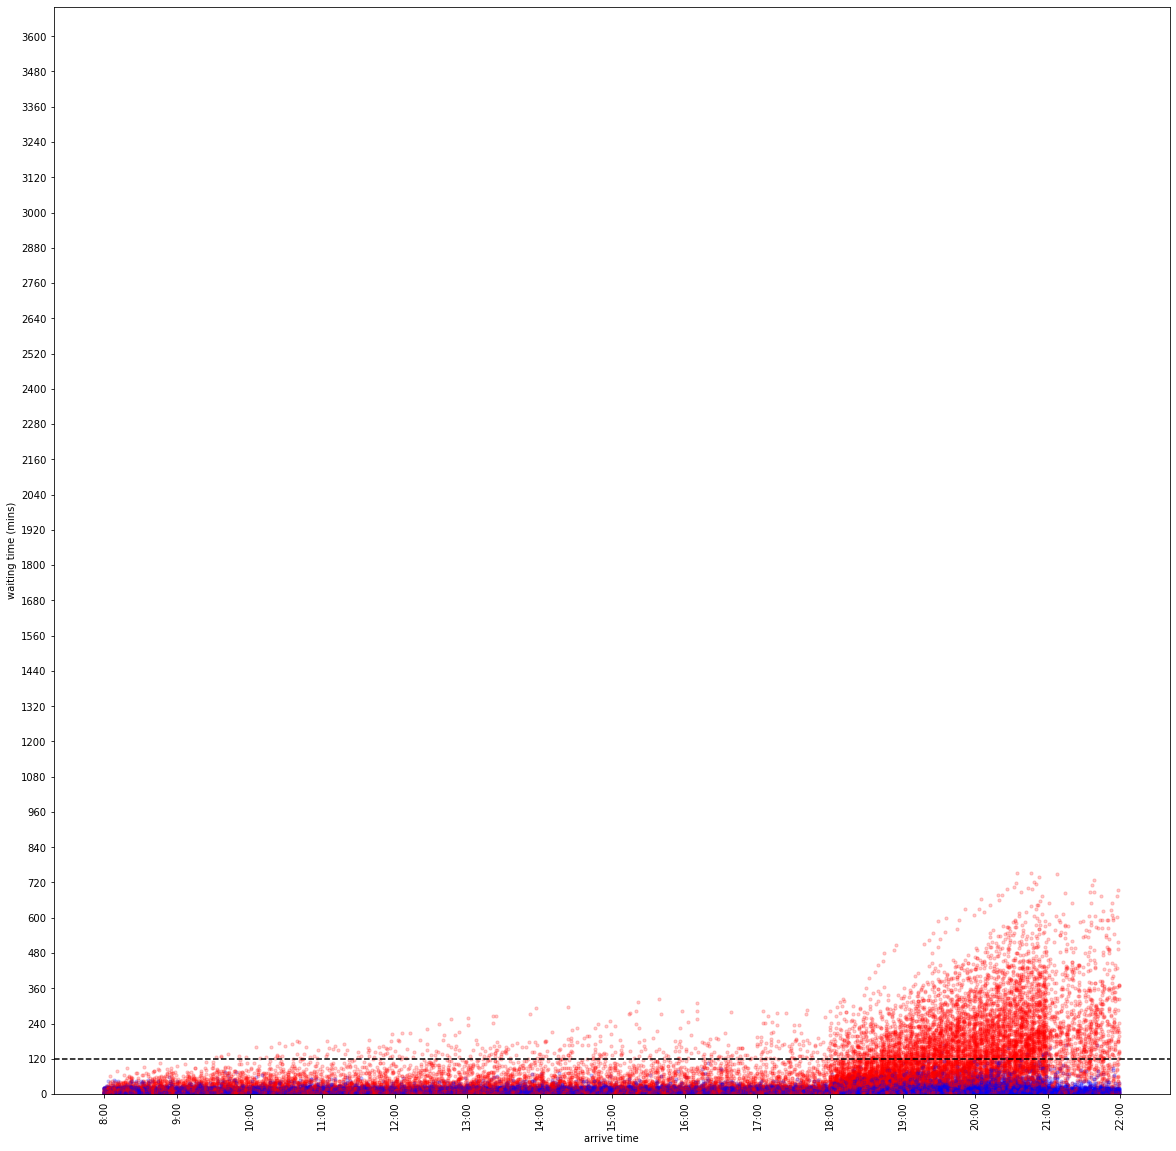

In [10]:
if __name__ == '__main__':
    laundry = Laundry.attribute_assign()

    day_list = ["mon","tue","wed","thu","fri","sat","sun"]
    fig, ax = plt.subplots(figsize = (20, 20))
    for _ in range(laundry.times):
        monday_num, tuesday_num, wednesday_num, thursday_num, friday_num, saturday_num, sunday_num = laundry.total_num_of_eachday()

        mon = laundry.update_method(monday_num)
        tue = laundry.update_method(tuesday_num)
        wed = laundry.update_method(wednesday_num)
        thu = laundry.update_method(thursday_num)
        fri = laundry.update_method(friday_num)
        sat = laundry.update_method(saturday_num)
        sun = laundry.update_method(sunday_num)

        for day in day_list:
            ###############first plot##############
            if day in ["sat","sun"]:
                scatter = ax.scatter(x=eval(day+'["arrive_time"]'), y=eval(day+'["Total_Waiting_time"]'),alpha=0.2,s=10,c='r')
            else:
                scatter = ax.scatter(x=eval(day+'["arrive_time"]'), y=eval(day+'["Total_Waiting_time"]'),alpha=0.2,s=10,c='b')

            y_major_locator=MultipleLocator(120)
            ax=plt.gca()
            ax.yaxis.set_major_locator(y_major_locator)
            plt.ylim(0,3700)
            plt.ylabel("waiting time (mins)")
            plt.xlabel("arrive time")
            plt.xticks([0,60,120,180,240,300,360,420,480,540,600,660,720,780,840],("8:00","9:00","10:00","11:00","12:00","13:00","14:00","15:00","16:00","17:00","18:00","19:00","20:00","21:00","22:00"),rotation="vertical")
    ax.axhline(y=120, color='black',linestyle='--')

The above visualization shows waiting time based on arrive time. The blue dots represent weekday data, while red ones indicate weekend data. We can see that the waiting time is obviously less than 2 hours at weekday, but increases dramatically at weekend. A time interval(18:00-21:00) has huge amount of points, which shows the washing habit of the residents. If you don’t want to waste time waiting for an available machine, you should go to the laundry room early at weekend. Also, we did a statistic about the percentage of waiting time less than 2 hours. The result shows there are xx% of waiting time less than 2 hours.


The plot of waiting time (mins) & num of people per week

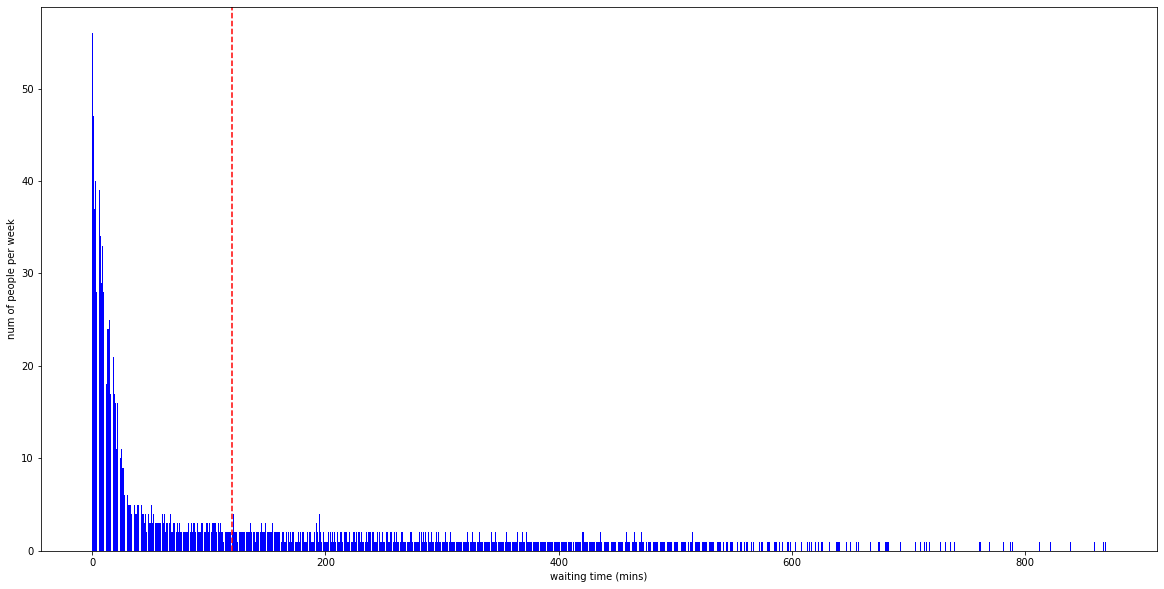

In [11]:
    fig1, ax1 = plt.subplots(figsize = (20, 10))
    for _ in range(laundry.times):
        monday_num, tuesday_num, wednesday_num, thursday_num, friday_num, saturday_num, sunday_num = laundry.total_num_of_eachday()

        mon = laundry.update_method(monday_num)
        tue = laundry.update_method(tuesday_num)
        wed = laundry.update_method(wednesday_num)
        thu = laundry.update_method(thursday_num)
        fri = laundry.update_method(friday_num)
        sat = laundry.update_method(saturday_num)
        sun = laundry.update_method(sunday_num)
        ###############second plot##############
        summary = pd.DataFrame()
        for day in day_list:
            summary = eval("summary.append("+ day +'.groupby(["Total_Waiting_time"])[["arrive_time"]].count().reset_index())')
        summary = summary.groupby(["Total_Waiting_time"]).sum().reset_index()
        bar = ax1.bar(x=summary["Total_Waiting_time"], height=summary["arrive_time"],color='blue')
        plt.ylabel("num of people per week")
        plt.xlabel("waiting time (mins)")
    ax1.axvline(x=120, color='red',linestyle='--')

The second visualization shows the number of people based on waiting time. It clearly shows there are much more people waiting less than 2 hours(the red line).

# Hypotheses 2 (run 300 times)

 please input the setting when reducing the frequency
* The Number of washing machines (Integer greater than 0):31
* The Number of dryers (Integer greater than 0):34
* The Number of resident (greater than 0):150
* The Maximum time to wait for the user to take out the clothes each time the washing machine or dryer finishes its work (0 min< time< 15 mins):4
* The Maximum time interval between two machine [end-beginning & both washing machines and dryers](0 min< time< 15 mins):10
* Each Maximum washing time of the washing machine (25 mins<time<70 mins):35
* Each Maximum working time of the dryer (35 mins<time<140 mins):60
* The washing frequency of each unit (* times/a week):1
* The times of simulation:300

 please input the setting with the same frequency above
* The Number of washing machines (Integer greater than 0):31
* The Number of dryers (Integer greater than 0):34
* The Number of resident (greater than 0):150
* The Maximum time to wait for the user to take out the clothes each time the washing machine or dryer finishes its work (0 min< time< 15 mins):4
* The Maximum time interval between two machine [end-beginning & both washing machines and dryers](0 min< time< 15 mins):10
* Each Maximum washing time of the washing machine (25 mins<time<70 mins):35
* Each Maximum working time of the dryer (35 mins<time<140 mins):60
* The washing frequency of each unit (* times/a week):2
* The times of simulation:300

## frequency = 2
First, we set frequency = 2. And, in the next cell, we will compare the above plot with the result without changing other parameters except frequency.

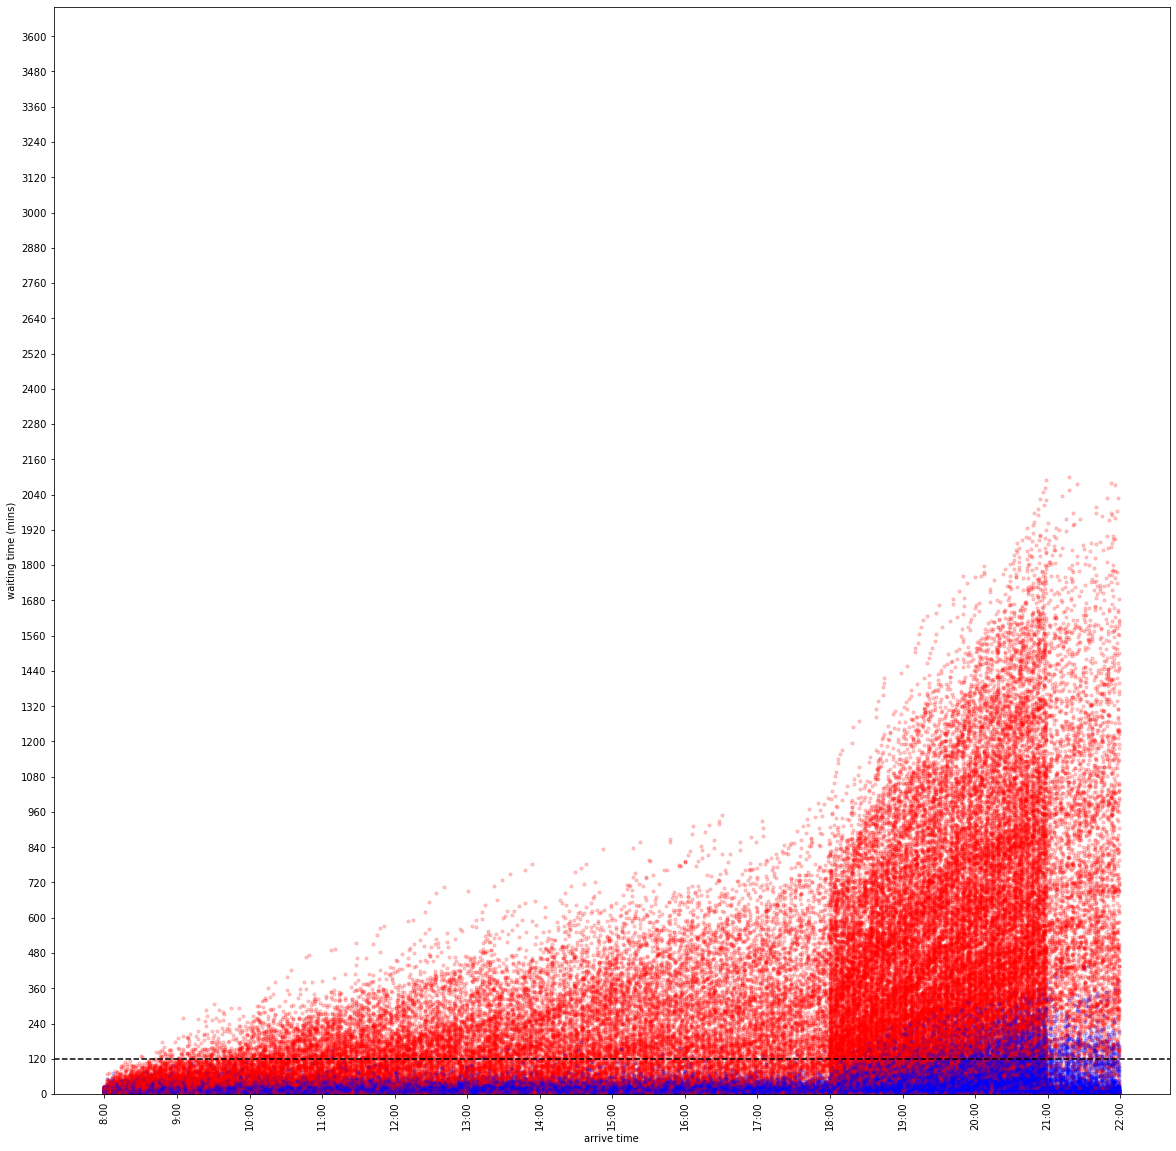

In [18]:
    laundry = Laundry.attribute_assign()
    day_list = ["mon","tue","wed","thu","fri","sat","sun"]
    fig, ax = plt.subplots(figsize = (20, 20))
    for _ in range(laundry.times):
        monday_num, tuesday_num, wednesday_num, thursday_num, friday_num, saturday_num, sunday_num = laundry.total_num_of_eachday()

        mon = laundry.update_method(monday_num)
        tue = laundry.update_method(tuesday_num)
        wed = laundry.update_method(wednesday_num)
        thu = laundry.update_method(thursday_num)
        fri = laundry.update_method(friday_num)
        sat = laundry.update_method(saturday_num)
        sun = laundry.update_method(sunday_num)

        for day in day_list:
            if day in ["sat","sun"]:
                scatter = ax.scatter(x=eval(day+'["arrive_time"]'), y=eval(day+'["Total_Waiting_time"]'),alpha=0.2,s=10,c='r')
            else:
                scatter = ax.scatter(x=eval(day+'["arrive_time"]'), y=eval(day+'["Total_Waiting_time"]'),alpha=0.2,s=10,c='b')

            y_major_locator=MultipleLocator(120)
            ax=plt.gca()
            ax.yaxis.set_major_locator(y_major_locator)
            plt.ylim(0,3700)
            plt.ylabel("waiting time (mins)")
            plt.xlabel("arrive time")
            plt.xticks([0,60,120,180,240,300,360,420,480,540,600,660,720,780,840],("8:00","9:00","10:00","11:00","12:00","13:00","14:00","15:00","16:00","17:00","18:00","19:00","20:00","21:00","22:00"),rotation="vertical")
    ax.axhline(y=120, color='black',linestyle='--')

## 20% of residence washing once per week (reduce washing frequency)


 please input the setting when reducing the frequency

 please input the setting with the same frequency above


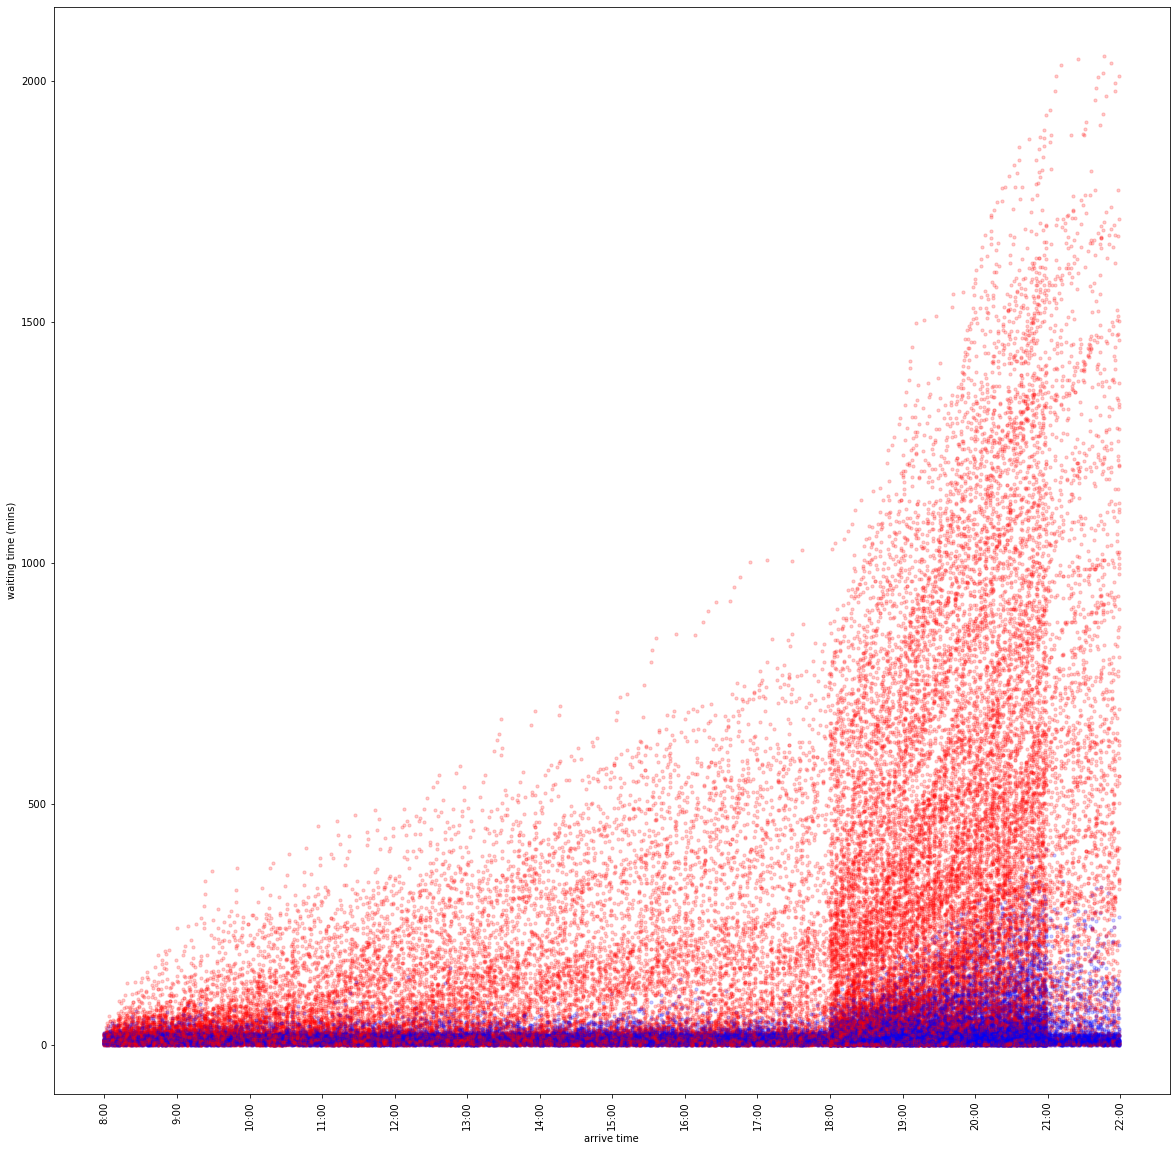

In [19]:
    print("\n please input the setting when reducing the frequency")
    laundry_hypo21 = Laundry.attribute_assign() # frequency = 1
    print("\n please input the setting with the same frequency above")
    laundry_hypo22 = Laundry.attribute_assign() # frequency = 2
    day_list_hypo2 = ["mon_less","tue_less","wed_less","thu_less","fri_less","mon_more","tue_more","wed_more","thu_more","fri_more"]
    fig3, ax3 = plt.subplots(figsize = (20, 20))
    for _ in range(laundry_hypo21.times):
        summary_workday = pd.DataFrame()
        summary_weekend = pd.DataFrame()
        mon_less, tue_less, wed_less, thu_less, fri_less, sat_less, sun_less = laundry_hypo21.total_num_of_eachday(percent=0.2)
        mon_more, tue_more, wed_more, thu_more, fri_more, sat_more, sun_more = laundry_hypo22.total_num_of_eachday(percent=0.8)
        for day in day_list_hypo2:
            summary_workday = eval("summary_workday.append(laundry_hypo21.update_method(" + day + "))")
            summary_workday = eval("summary_workday.append(laundry_hypo22.update_method(" + day + "))")
        for day in ["sat_less","sun_less","sat_more","sun_more"]:
            summary_weekend = eval("summary_weekend.append(laundry_hypo21.update_method(" + day + "))")
            summary_weekend = eval("summary_weekend.append(laundry_hypo22.update_method(" + day + "))")
        scatter = ax3.scatter(x=summary_workday["arrive_time"], y=summary_workday["Total_Waiting_time"],alpha=0.2,s=10,c='b')
        scatter = ax3.scatter(x=summary_weekend["arrive_time"], y=summary_weekend["Total_Waiting_time"],alpha=0.2,s=10,c='r')
        plt.ylabel("waiting time (mins)")
        plt.xlabel("arrive time")
        plt.xticks([0,60,120,180,240,300,360,420,480,540,600,660,720,780,840],("8:00","9:00","10:00","11:00","12:00","13:00","14:00","15:00","16:00","17:00","18:00","19:00","20:00","21:00","22:00"),rotation="vertical")
    ax.axhline(y=120, color='black',linestyle='--')

# calculate the avg waiting time

The percent of people wait less than 2hours on workdays: 100.0
The percent of people wait less than 2hours on weekend 74.71264367816092
The percent of people wait less than 2hours on workdays: 100.0
The percent of people wait less than 2hours on weekend 71.11111111111111
The percent of people wait less than 2hours on workdays: 100.0
The percent of people wait less than 2hours on weekend 91.11111111111111
The percent of people wait less than 2hours on workdays: 100.0
The percent of people wait less than 2hours on weekend 68.75
The percent of people wait less than 2hours on workdays: 100.0
The percent of people wait less than 2hours on weekend 70.37037037037037
The percent of people wait less than 2hours on workdays: 100.0
The percent of people wait less than 2hours on weekend 63.095238095238095
The percent of people wait less than 2hours on workdays: 100.0
The percent of people wait less than 2hours on weekend 57.7319587628866
The percent of people wait less than 2hours on workdays: 100

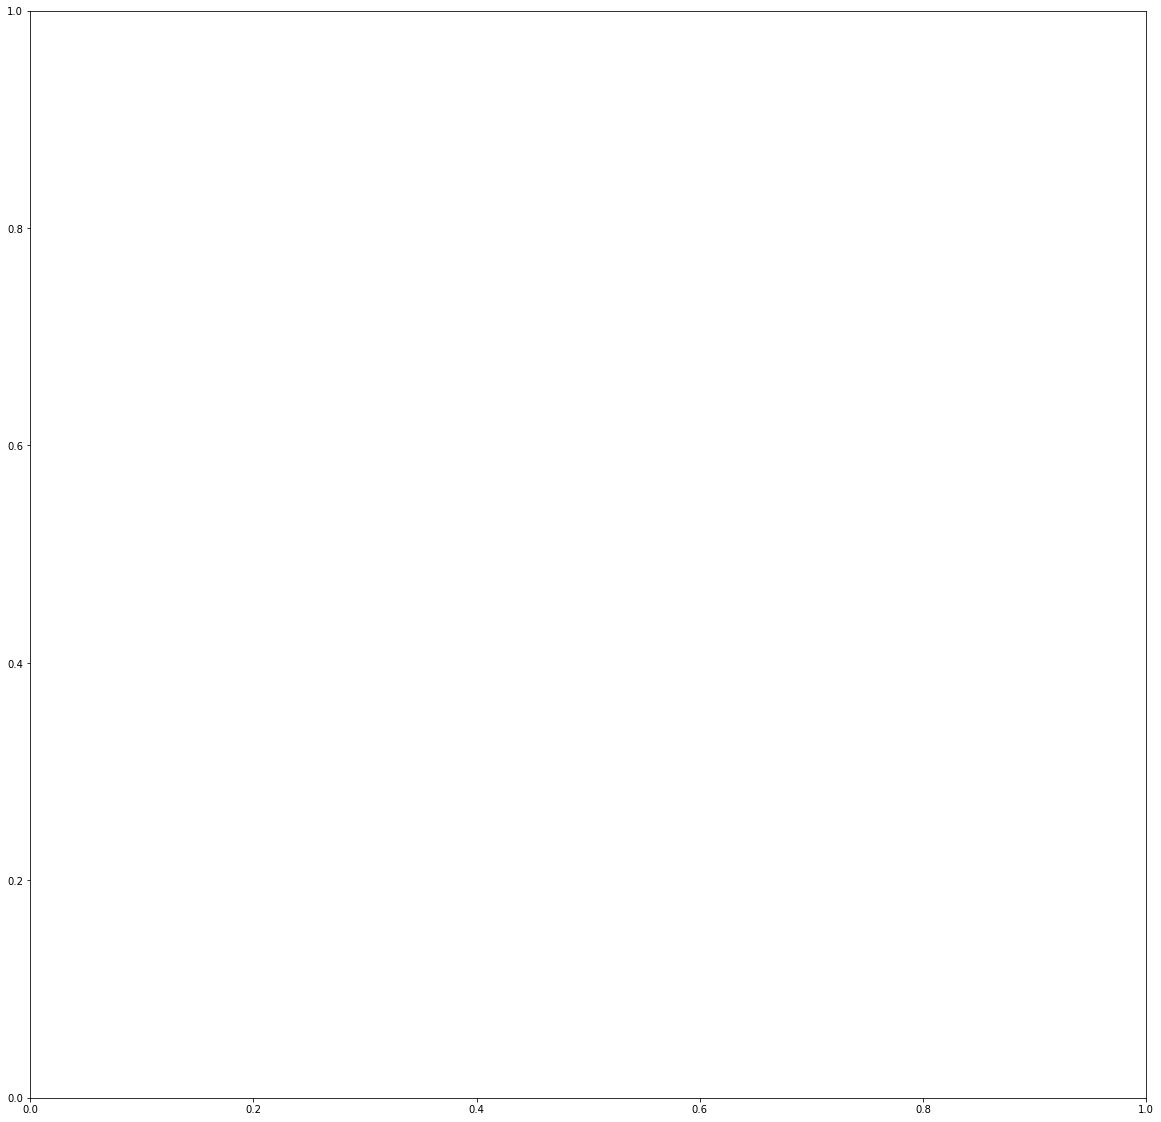

In [20]:
    laundry = Laundry.attribute_assign() # frequency = 1
    day_list = ["monday_num","tuesday_num","wednesday_num","thursday_num","friday_num"]
    fig3, ax3 = plt.subplots(figsize = (20, 20))
    for _ in range(laundry.times):
        summary_workday = pd.DataFrame()
        summary_weekend = pd.DataFrame()
        monday_num, tuesday_num, wednesday_num, thursday_num, friday_num, saturday_num, sunday_num = laundry.total_num_of_eachday()

        for day in day_list:
            summary_workday = eval("summary_workday.append(laundry.update_method(" + day + "))")
        for day in ["saturday_num","sunday_num"]:
            summary_weekend = eval("summary_weekend.append(laundry.update_method(" + day + "))")

        print("The percent of people wait less than 2hours on workdays: {0}".format((summary_workday.loc[summary_workday["Total_Waiting_time"]<120].shape[0])*100/summary_workday.shape[0]))
        print("The percent of people wait less than 2hours on weekend {0}".format((summary_weekend.loc[summary_weekend["Total_Waiting_time"]<120].shape[0])*100/summary_weekend.shape[0]))